# Default cartão de crédito
## Classificador binário e Regressão Logística  
#### SKLEARN

In [42]:
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,classification_report

import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

In [4]:
data = pd.read_csv('CC2.csv')
data.head(3)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947


In [5]:
data.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


In [6]:
#int variables into categoric ones (binary)
data['default'] = data['default'].replace({'No':0,'Yes':1})
data['student'] = data['student'].replace({'No':0,'Yes':1})

#setting first column as index
data.set_index('Unnamed: 0', inplace=True)

In [7]:
data['student']=data['student'].astype('category')
data['default']=data['student'].astype('category')

In [8]:
#deleting Balance = 0 observations
data = data[data['balance']>0]

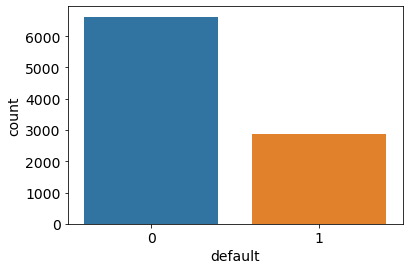

In [122]:
sns.countplot('default', data=data)
plt.show()

#### Exploratory analysis was made on the Multiple Regression analysis file

# Logistic Regression

> ###  Split train and test data

In [12]:
#first split: dataset with all features 
xtrain,xtest,ytrain,ytest = train_test_split(data[['balance','student','income']],
                                             data['default'],test_size=.25,random_state=42)



> ### SKLEARN logistic regression 
> #### Treino

In [112]:
model1 = LogisticRegression(max_iter=2000,solver='liblinear',class_weight='balanced').fit(xtrain, ytrain)
model2 = LogisticRegression(max_iter=2000,solver='liblinear').fit(xtrain, ytrain)
ypred1 = model1.predict(xtest)
ypred2 = model2.predict(xtest)

print(classification_report(ytest,ypred1,digits=2), classification_report(ytest,ypred2,digits=2) )

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1640
           1       0.97      0.99      0.98       736

    accuracy                           0.99      2376
   macro avg       0.98      0.99      0.99      2376
weighted avg       0.99      0.99      0.99      2376
               precision    recall  f1-score   support

           0       0.84      0.95      0.90      1640
           1       0.85      0.61      0.71       736

    accuracy                           0.85      2376
   macro avg       0.85      0.78      0.80      2376
weighted avg       0.85      0.85      0.84      2376



### Confusion Matrix

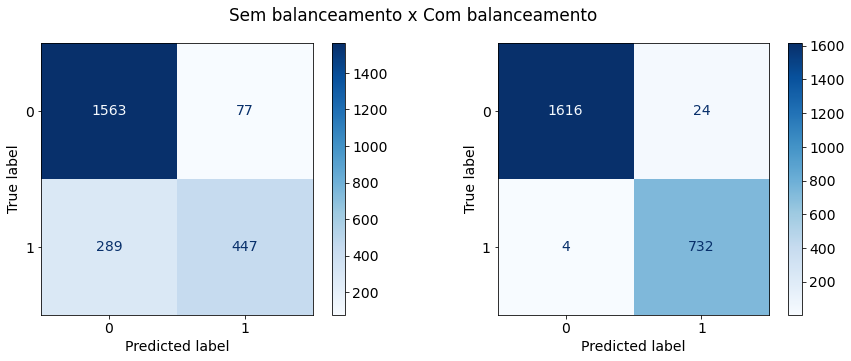

In [113]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Sem balanceamento x Com balanceamento')
plot_confusion_matrix(model2,xtest,ytest,cmap='Blues',ax=ax[0])
plot_confusion_matrix(model1,xtest,ytest,cmap='Blues',ax=ax[1])
plt.show()

### ROC Curve

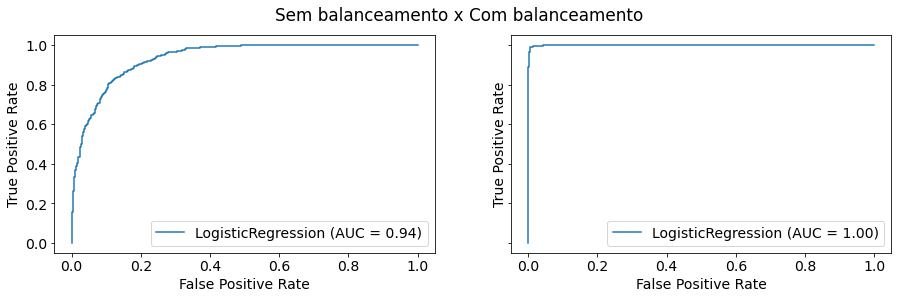

In [115]:
fig, ax = plt.subplots(1,2,figsize=(15,4),sharex=True,sharey=True)
plot_roc_curve(model2,xtest,ytest,ax=ax[0])
plot_roc_curve(model1,xtest,ytest,ax=ax[1])
fig.suptitle("Sem balanceamento x Com balanceamento")
plt.show()